In [ ]:
#importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow import keras


In [ ]:
#loading the dataset
(X_train,Y_train),(x_test,y_test)= keras.datasets.mnist.load_data()

In [ ]:
#scaling the dataset
X_train=X_train/255
x_test=x_test/255

In [ ]:
#summarise the dataset
print("Train : X=%s, Y=%s"%(X_train.shape,Y_train.shape))
print("Test : x=%s, y=%s"%(x_test.shape,y_test.shape))

Train : X=(60000, 28, 28), Y=(60000,)
Test : x=(10000, 28, 28), y=(10000,)


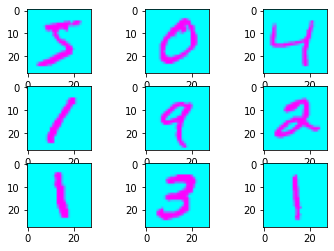

In [ ]:
#plot first few images of train set
for i in range(9):
  plt.subplot(330+1+i)
  cmap=plt.get_cmap("cool")
  plt.imshow(X_train[i],cmap)

plt.show()

In [ ]:
#print first few labels of train set
for i in range(9):
  print(Y_train[i],end=" ")

5 0 4 1 9 2 1 3 1 

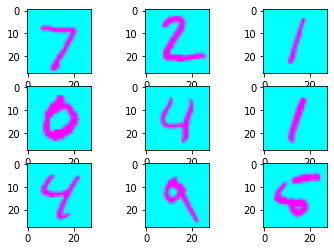

In [ ]:
#plot first few images of test set
for i in range(9):
  plt.subplot(330+1+i)
  cmap=plt.get_cmap("cool")
  plt.imshow(x_test[i],cmap)

plt.show()

In [ ]:
#print first few labels of test set
for i in range(9):
  print(y_test[i],end=" ")

7 2 1 0 4 1 4 9 5 

In [ ]:
#resizing image to a 1d array
X_train=X_train.reshape(-1,28,28,1)
print(X_train.shape)


x_test=x_test.reshape(-1,28,28,1)
print(x_test.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
#creating a convolutional neural network

cnn_network = models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(20,activation="relu"),
    layers.Dense(10,activation="softmax")
])


cnn_network.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics="accuracy")
cnn_network.fit(X_train,Y_train,epochs=10)
#learning rate=0.001 for adam optimizer and it increases or decreases as we go along training







Epoch 1/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.2414 - accuracy: 0.9229
Epoch 2/10
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0815 - accuracy: 0.9747
Epoch 3/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0587 - accuracy: 0.9819
Epoch 4/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0467 - accuracy: 0.9854
Epoch 5/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0365 - accuracy: 0.9887
Epoch 6/10
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0299 - accuracy: 0.9904
Epoch 7/10
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0255 - accuracy: 0.9920
Epoch 8/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.0209 - accuracy: 0.9930
Epoch 9/10
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0159 - accuracy: 0.9947
Epoch 10/10
1875/1875 [==============================] - 57s 31m

In [ ]:

#evaluating the model for test dataset
cnn_network.evaluate(x_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.0496 - accuracy: 0.9873


[0.0495767779648304, 0.9872999787330627]

In [ ]:
#the predicted probabilities for each integer is stored
y_pred_prob=cnn_network.predict(x_test)

#example
print(y_pred_prob[0])
print(np.argmax(y_pred_prob[0]))

313/313 [==============================] - 3s 10ms/step
[1.7873273e-05 3.8410255e-04 4.6289104e-05 1.7234323e-05 5.4353222e-06
 1.5408201e-08 2.5993280e-11 9.9950534e-01 1.8019133e-06 2.1756576e-05]
7


In [ ]:
#storing predicted labels
y_pred_labels=[np.argmax(i) for i in y_pred_prob]

print(y_pred_labels[0:9])

[7, 2, 1, 0, 4, 1, 4, 9, 5]


In [ ]:
#uploading a custom image

